# Heart Disease Classification
By Ganel R. Nallamilli

***
## Contents
- **1. Introduction**
    - 1.1 1.1 Aims
    - 1.2 The Heart Disease Dataset
- **2. Data Preparation**
    - 2.1 Dataset Overview
- **3. Feature Selection**
    - 3.1 Chi-Square Test of Independence
    - 3.2 One-Way ANOVA Test of Independence
    - 3.3 Testing Associations
    - 3.4 Dimensionality Reduction
- **4. Classification**
    - 4.1 Building the Model
    - 4.2 Feature Importance
- **5. Conclusion**


***

## 1 Introduction
### 1.1 Aims

The aim of this notebook is to explore the relationship between different attributes of the patients health to accurately predict if a patient has heart disease or not.

### 1.2 The Heart Disease Dataset

This dataset contains four databases from Cleveland, Hungary, Switzerland, and Long Beach V. The datset consists of 1025 entries with 14 attributes describing features of the patient.

Each entry consists of categorical, integer and real data, which can be  categorised into '0' = no heart disease and '1' = heart disease, given the field name target. Download this dataset here: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

The atrribute informaton is shown in the table below.


|Attribute Name|Description|Types of labels
|--------------|---------|---------------
|age|age| Age in years
|sex|sex|1 = male; 0 = female
|cp|chest pain type| Types of chest pain labelled (0,1,2,3)
|trestbps|resting blood pressure| Reading measured in mmHg 
|chol|serum cholestoral| Reading measured in mg/dl 
|fbs|fasting blood sugar| Either 1 if reading is > 120 mg/dl otherwise 0
|restecg|resting electrocardiographic results| Values of 0,1,2
|thalach| maximum heart rate achieved| Reading measured in BPM
|exang| exercise induced angina| 1 = Yes; 0 = No
|oldpeak|oldpeak = ST depression induced by exercise relative to rest| Float
|slope|the slope of the peak exercise ST segment| Values of 0,1,2
|ca| number of major vessels colored by flourosopy| Values of 0,1,2,3
|thal| heart defect|0 = normal; 1 = fixed defect; 2 = reversable defect

***

## 2 Data Preparation

### 2.1 Dataset Overview

In [2]:
# Imports 
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Read dataset into pandas DataFrame
heart = pd.read_csv("dataset.csv")


# Split into features and classes
X = heart.loc[:, heart.columns != "target"]
y = heart["target"]

print("The dataset contains {} rows and {} columns. \n".format(heart.shape[0], heart.shape[1]))
print("Number of unique labels for each category: \n")
print(heart.nunique().sort_values(ascending=False))
print()

class_counts = heart["target"].value_counts()
class_counts.index = ["Heart Disease", "No Heart Disease"]

print("Percentage of each class:")
print(class_counts/heart.shape[0] * 100)
heart.head()

The dataset contains 1025 rows and 14 columns. 

Number of unique labels for each category: 

chol        152
thalach      91
trestbps     49
age          41
oldpeak      40
ca            5
cp            4
thal          4
restecg       3
slope         3
sex           2
fbs           2
exang         2
target        2
dtype: int64

Percentage of each class:
Heart Disease       51.317073
No Heart Disease    48.682927
Name: target, dtype: float64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Every attribute contains at least 1 unqiue label, which indicates that all attributes may provide useful information which may help categorise the condition of the heart. Furthermore, our dataset is split almost equally in terms of heart diesease and no heart disese entries, which is great for training as we don't have to worry about a bias in our model.

***
## 3 Feature Selection

### 3.1 Chi-Square Test of Independence

We want to see if each attribute in our dataset is not independent or independent to our indepentant variable target, which is the classifer attribute. The Chi-Squared test can only compare categorical variables hence, we must exclude these out of our dataset while performing the test.

In [4]:
#Excluding continous attributes.
x_categorical = X.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak',])
x_categorical.head()


,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,0,0,1,0,2,2,3
1,1,0,1,0,1,0,0,3
2,1,0,0,1,1,0,0,3
3,1,0,0,1,0,2,1,3
4,0,0,1,1,0,1,3,2


The Assumptions:
1. The sampling method is random
2. The variables are categorical
3. The sample size is large enough such that all expected frequencies are greater than 1 and at least 80% are greater than 5

These assumptions hold true for our new 'x_categorical' data frame.

Testing for a 5% significant level.

Hypotheses:

$H_{0}:$ A and B are independent

$H_{1}:$ A and B are not independent

In [5]:
# Define alpha
alpha = 0.05

values_categorical = {}
print(x_categorical.columns.values)

for col in x_categorical.columns.values:

    column_array, target_array = heart[col], heart["target"]

    dfObserved = pd.crosstab(column_array, target_array) 
    chi2, p, dof, expected = scipy.stats.chi2_contingency(dfObserved.values)
    values_categorical[col] = p
    if p < alpha:
        # Reject null hypothesis
        print("{} is important. (p = {})".format(col, p))
    else:
        # Accept null hypothesis
        print("{} is NOT important. (p = {})".format(col, p))

values_categorical

['sex' 'cp' 'fbs' 'restecg' 'exang' 'slope' 'ca' 'thal']
sex is important. (p = 6.656820681726434e-19)
cp is important. (p = 1.2980664694820452e-60)
fbs is NOT important. (p = 0.21862413102893974)
restecg is important. (p = 1.6964251003877617e-08)
exang is important. (p = 2.8266374296634637e-44)
slope is important. (p = 1.421085239254566e-34)
ca is important. (p = 1.747013451046176e-54)
thal is important. (p = 1.7958943544531507e-60)


{'sex': 6.656820681726434e-19,
 'cp': 1.2980664694820452e-60,
 'fbs': 0.21862413102893974,
 'restecg': 1.6964251003877617e-08,
 'exang': 2.8266374296634637e-44,
 'slope': 1.421085239254566e-34,
 'ca': 1.747013451046176e-54,
 'thal': 1.7958943544531507e-60}

We see that fasting blood sugar seems to be independent of the someone having heart disease or not... intuitively this seems wrong from my basic knowledge of biology, however it couldn't suggest the cut off of  > 120 mg/dl may be too low to suggest there is a corrolation between heart disease and fasting blood sugar. All other attributes may have some significance when determining if a patient has heart disease. 

In [6]:
# Drop the fbs column
heart = heart.drop(["fbs"], axis=1)
X = X.drop(["fbs"], axis=1)

### 3.2 One-Way ANOVA Test of Independence

For the continious attributes we want test if they are independent or not independent to the target categorical attribute. To do this we use the One-Way ANOVA Test.

The Assumptions:

1. The population from which samples are drawn should be normally distributed.
2. Independence of cases: the sample cases should be independent of each other.
3. Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal.

Hypothesis: 

$H_{0}:$ There is no significant difference among the groups

$H_{0}:$  There is a significant difference among the groups


In [7]:
#Excluding categorical attributes.
x_continious = X.drop(columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal' ])
x_continious.head()

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


In [8]:
# Define alpha
alpha = 0.05

values_continious = {}
print(x_continious.columns.values)

for col in x_continious.columns.values:


    statistic, p = scipy.stats.f_oneway(heart[col], heart["target"])
    values_continious[col] = p
    if p < alpha:
        # Reject null hypothesis
        print("{} is important. (p = {})".format(col, p))
    else:
        # Accept null hypothesis
        print("{} is NOT important. (p = {})".format(col, p))

['age' 'trestbps' 'chol' 'thalach' 'oldpeak']
age is important. (p = 0.0)
trestbps is important. (p = 0.0)
chol is important. (p = 0.0)
thalach is important. (p = 0.0)
oldpeak is important. (p = 1.3815002437202695e-42)


We see that all continious attributes have some significance when determining if a patient has heart disease. 

In [9]:
#Merging values dictionarys
values = values_continious | values_categorical
values

{'age': 0.0,
 'trestbps': 0.0,
 'chol': 0.0,
 'thalach': 0.0,
 'oldpeak': 1.3815002437202695e-42,
 'sex': 6.656820681726434e-19,
 'cp': 1.2980664694820452e-60,
 'fbs': 0.21862413102893974,
 'restecg': 1.6964251003877617e-08,
 'exang': 2.8266374296634637e-44,
 'slope': 1.421085239254566e-34,
 'ca': 1.747013451046176e-54,
 'thal': 1.7958943544531507e-60}

In [10]:
#Displays the relative importance of each attribute
sorted(values.items(), key=lambda x: x[1])

[('age', 0.0),
 ('trestbps', 0.0),
 ('chol', 0.0),
 ('thalach', 0.0),
 ('cp', 1.2980664694820452e-60),
 ('thal', 1.7958943544531507e-60),
 ('ca', 1.747013451046176e-54),
 ('exang', 2.8266374296634637e-44),
 ('oldpeak', 1.3815002437202695e-42),
 ('slope', 1.421085239254566e-34),
 ('sex', 6.656820681726434e-19),
 ('restecg', 1.6964251003877617e-08),
 ('fbs', 0.21862413102893974)]

### 3.3 Testing Associations

For categorical features comparisons, we can use the Corrected Cramer V statisic to compute an association from 0 - not associated to 1 - strongly associated.

C:\Windows\Temp\ipykernel_18008\2008113111.py:42: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


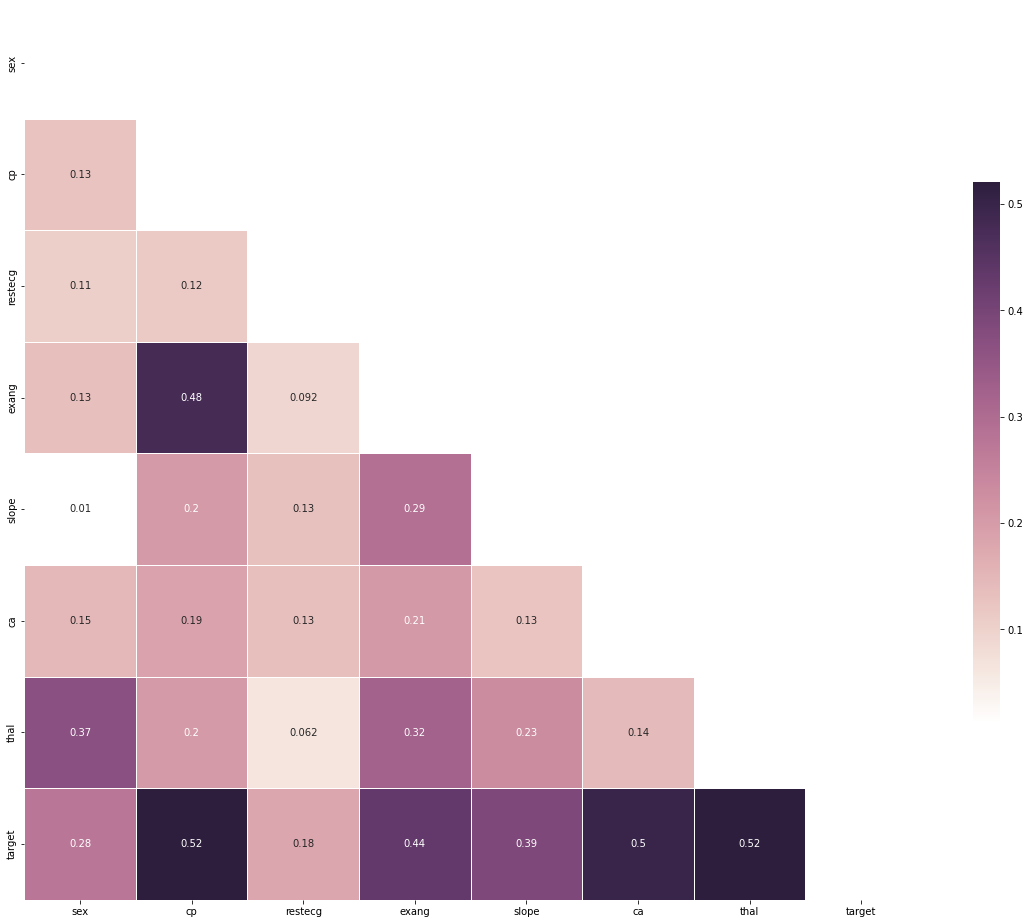

In [30]:
import itertools

x_categorical = heart.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak',])

def cramers_corrected_stat(confusion_matrix):
    """
    Calculates the corrected Cramer's V statistic
    
    Args:
        confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
    Returns:
        The corrected Cramer'v V statistic
    """
    
    chi2, _, _, _ = scipy.stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cols = list(x_categorical.columns.values)
corrM = np.zeros((len(cols),len(cols)))

# Calculate correlations of every combination of variables
for col1, col2 in itertools.combinations(cols, 2):

    A, B = x_categorical[col1], x_categorical[col2]
    
    idx1, idx2 = cols.index(col1), cols.index(col2)
    dfObserved = pd.crosstab(A,B) 
    corrM[idx1, idx2] = cramers_corrected_stat(dfObserved.values)
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)

# Mask to get lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask 
fig = plt.figure(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("cramer.eps", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)
plt.savefig("cramer.png", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)
plt.show()

Ultimately we don't see a very strong corrolation between the target and all other attributes. This suggests that no single attribute can greatly predict if a patient has heart disease or not.

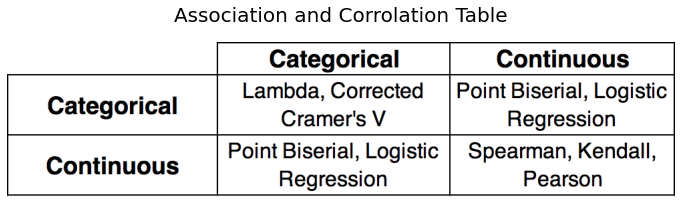

In [12]:
from PIL import Image

titles = {"corrolation_table.png": "Association and Corrolation Table"}

fig, axarr = plt.subplots(1,1, figsize=(10, 10))
fig.tight_layout()

#Source: https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
im = Image.open("img/corrolation_table.png")
axarr.imshow(im)
axarr.axis("off")
axarr.set_title(titles['corrolation_table.png'], fontsize=20, pad=20)

    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

Our target variable is categorical and we would like to compare it with continuous features, for this assoication we will use Point Biserial. For continuous to continuous corrolations we will be using the spearman. 

C:\Windows\Temp\ipykernel_18008\3792237919.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


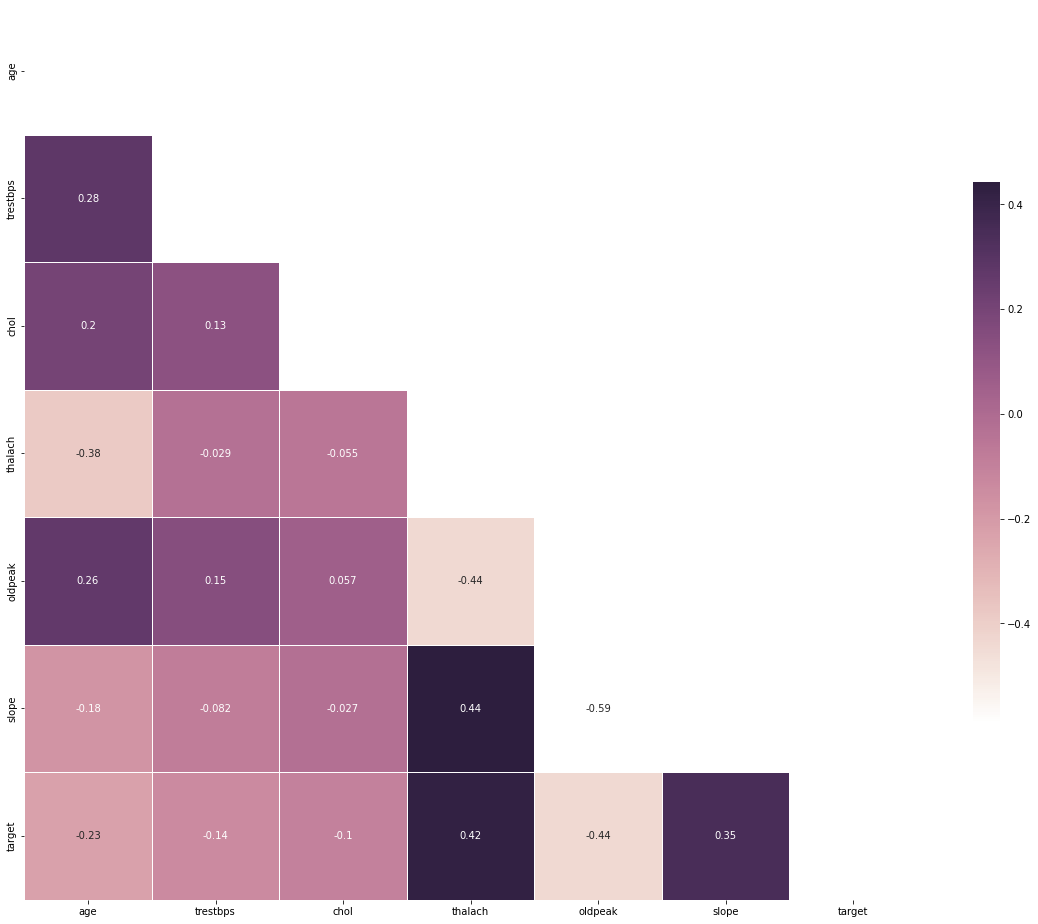

In [31]:
import itertools


x_continious = heart.drop(columns=['sex', 'cp', 'restecg', 'exang', 'ca', 'thal'])


cols = list(x_continious.columns.values)
corrM = np.zeros((len(cols),len(cols)))

# Calculate correlations of every combination of variables
for col1, col2 in itertools.combinations(cols, 2):

    A, B = x_continious[col1], x_continious[col2]
    
    idx1, idx2 = cols.index(col1), cols.index(col2)

    #if one element is target use point biserial else use spearman.
    if col1 == 'target' or col2 == 'target':
        if col1 == 'target':
            r, p = scipy.stats.pointbiserialr(x_continious[col1],x_continious[col2])
            corrM[idx1, idx2] = r 
        elif col2 == 'target':
            r, p = scipy.stats.pointbiserialr(x_continious[col2],x_continious[col1])
            corrM[idx1, idx2] = r 
    else: 
        r, p = scipy.stats.spearmanr(x_continious[col2],x_continious[col1])
        corrM[idx1, idx2] = r 
        
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)

# Mask to get lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask 
fig = plt.figure(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("continious.eps", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)
plt.savefig("continious.png", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)
plt.show()

Similar to our categorical tests, we see that we have no features which strongly corrolate to the target. This indicates that our machine learning model will have to take in quite alot of features to be able to accurately predict an outcome.

***
### 3.4 Dimensionality Reduction

To help visualise our data we can perform dimensionality reduction to see the relationship between our indepentant variables in our dataset, without looking at each feature individually. 

As we have a mix of categorical and continous variables factor analysis seems most appropriate. 

In [14]:
x = heart.drop(columns = ['target'])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


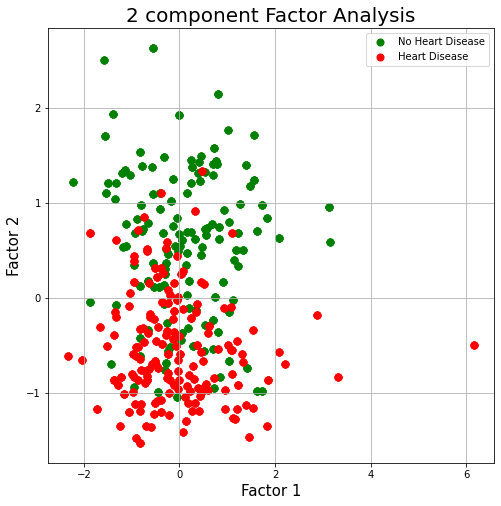

In [32]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(x)
X_transformed = pd.DataFrame(X_transformed)
X_transformed.columns = ['Factor 1', 'Factor 2']
finalDf = pd.concat([X_transformed, heart['target']], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Factor 1', fontsize = 15)
ax.set_ylabel('Factor 2', fontsize = 15)
ax.set_title('2 component Factor Analysis', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    label = ""
    if target == 1:
        label = "Heart Disease"
    else:
        label = "No Heart Disease"

    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Factor 1']
               , finalDf.loc[indicesToKeep, 'Factor 2']
               , c = color
               , s = 50, label = label)
ax.legend()
ax.grid()
plt.savefig("Factor_Analysis.eps", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)
plt.savefig("Factor_Analysis.png", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)
plt.show()

We see that the dataset overlap quite abit which suggest that a simple logistic regression classifer may not suitable for this dataset.

A more modern technique, t-SNE, retains the locality of points in higher dimensions to nearby points in lower dimensions. By maintaing the locaity, we are better able to visualise how our dataset groups together. Various perplexity parameters are tested, which allows us to find the best value to visualize our data.

In [16]:
finalDf.head()

,Factor 1,Factor 2,target
0,-0.659169,-0.332780,0
1,-0.833050,1.531303,0
2,-1.394973,1.938078,0
3,-0.833420,-0.418664,0
4,0.930919,0.924033,0


d:\Languages\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Languages\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\Languages\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Languages\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\Languages\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Languages\Python\Python39\lib\site-packages\sklearn\manifo

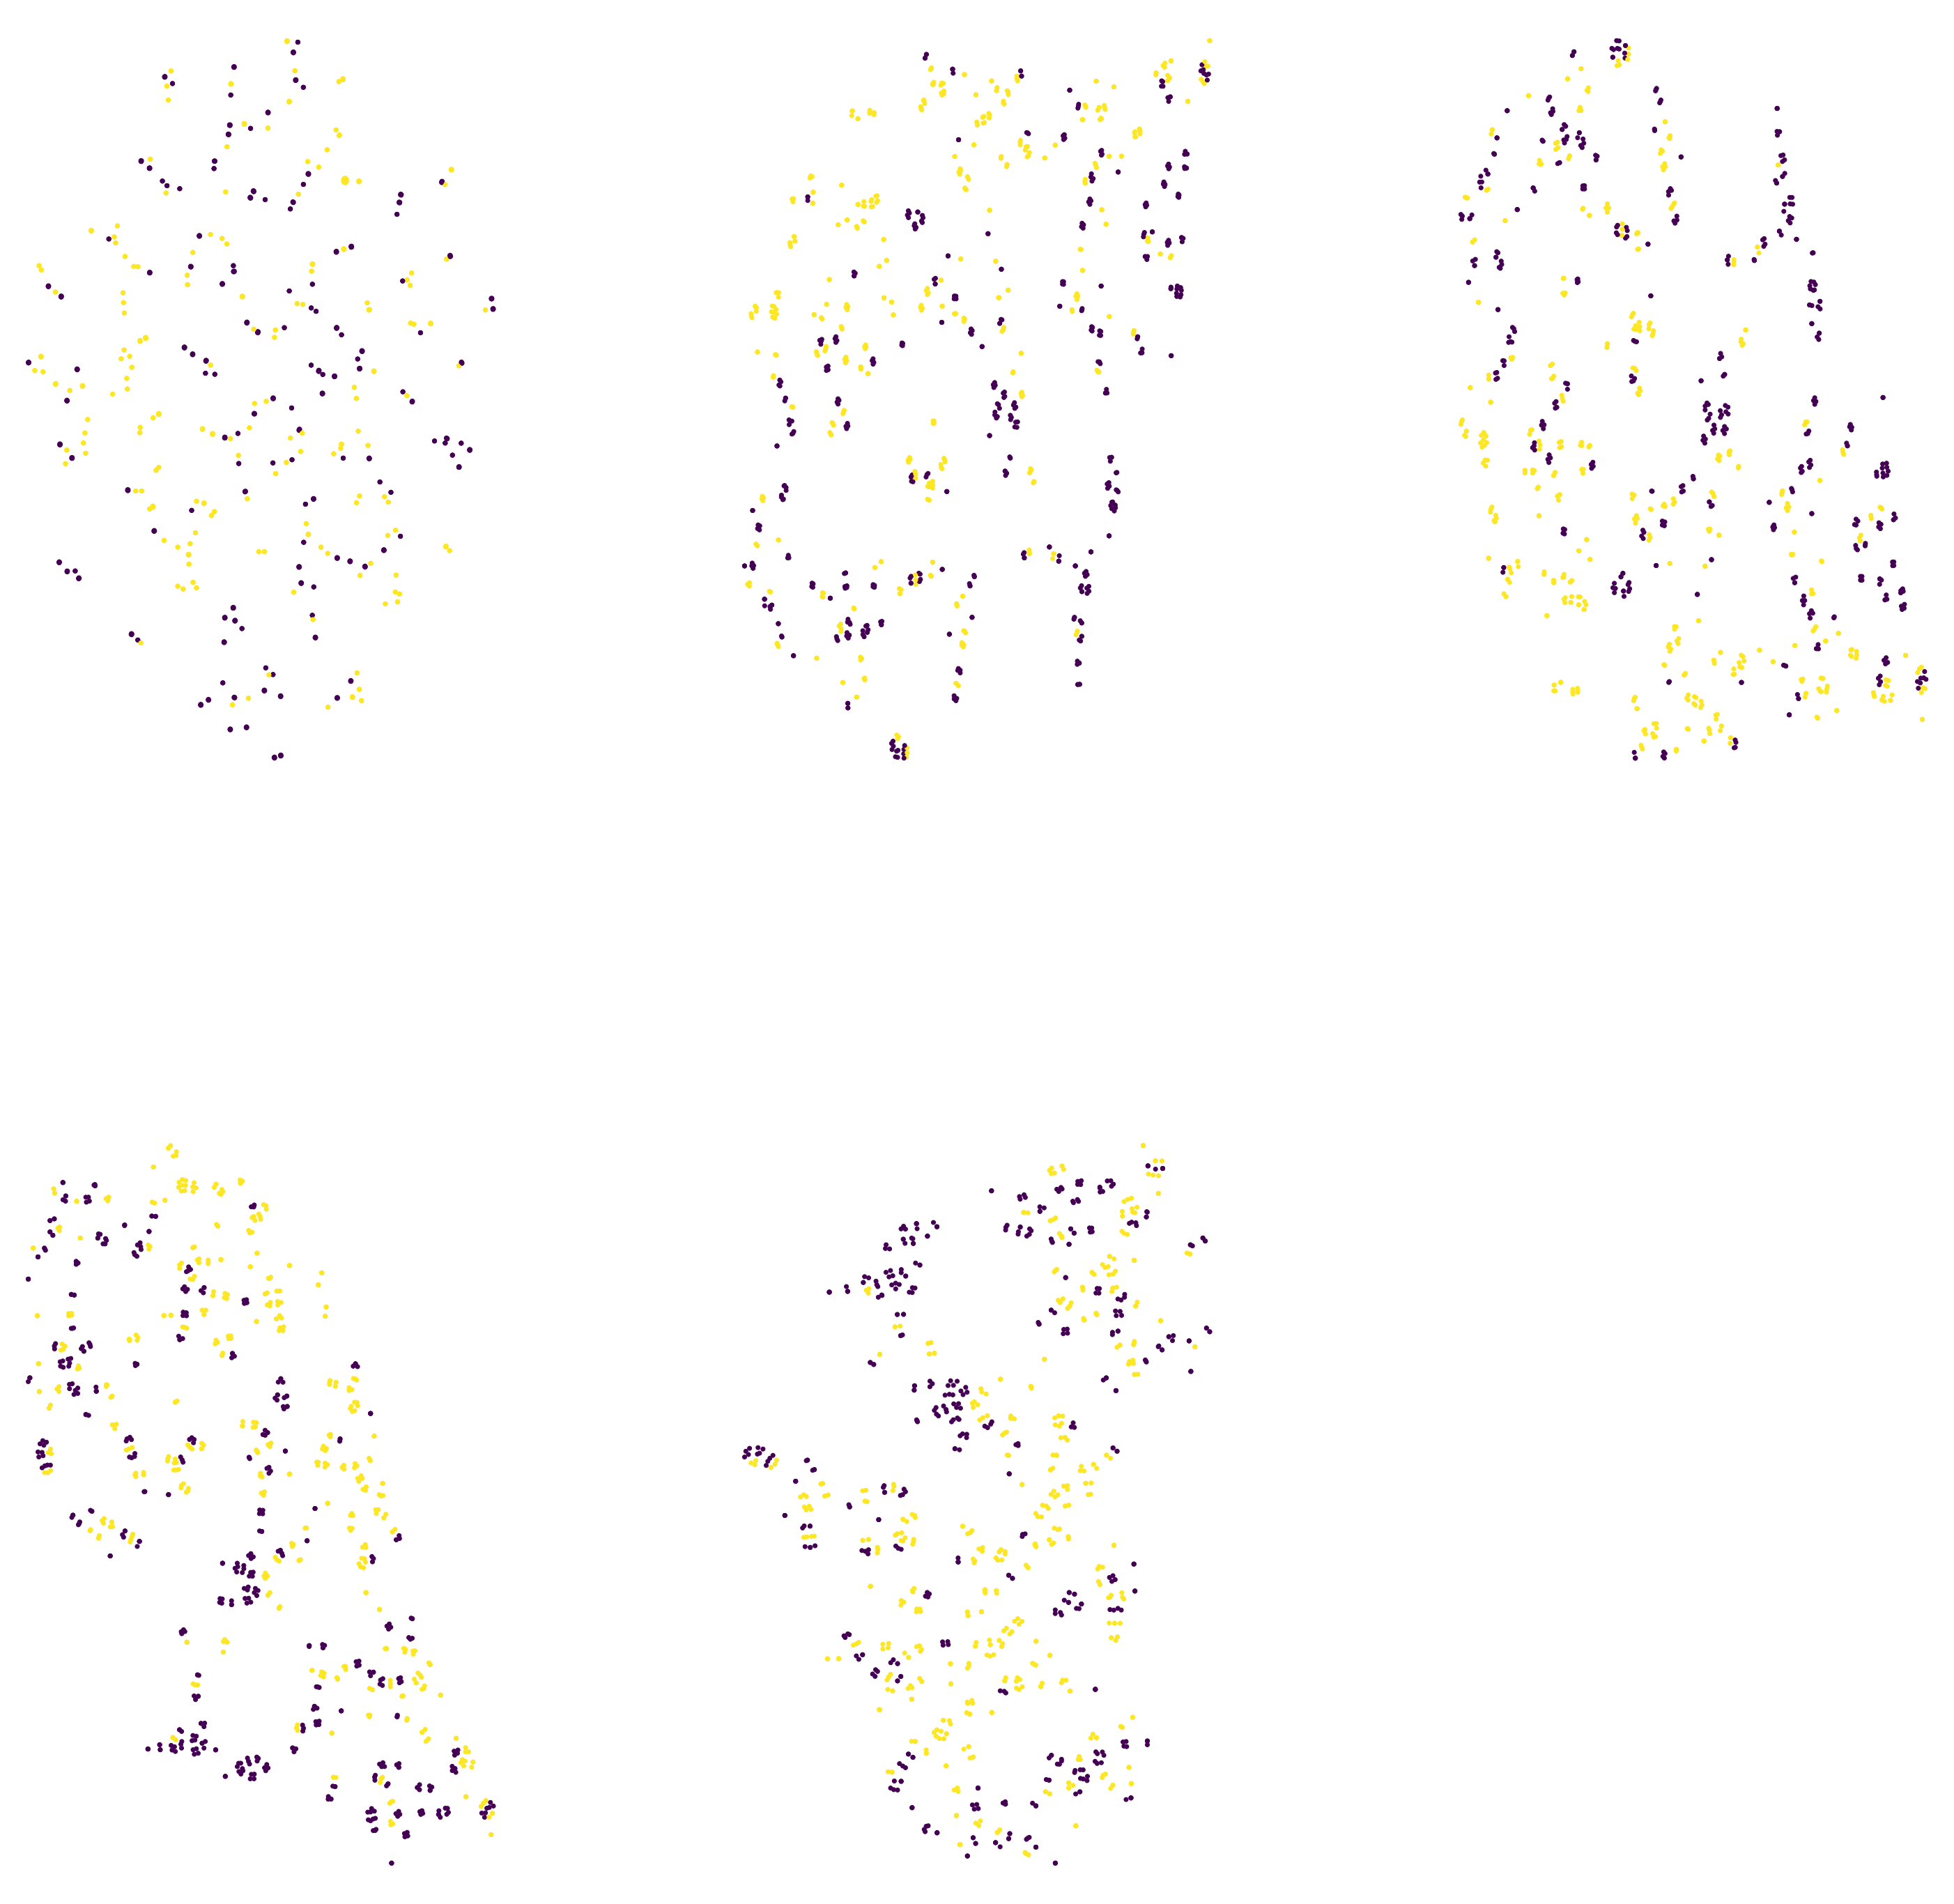

In [33]:
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(50,50))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Perplexities to test
perplexities = [5, 20, 25, 30, 50]

# Perform t-SNE on the one-hot encoded labels
for i, p in enumerate(perplexities, 1):
    ax = fig.add_subplot(2, 3, i)
    
    tsne = TSNE(n_components=2, perplexity=p)
    clusters = tsne.fit_transform(x)
    plt.axis("off")

    plt.scatter(clusters[:, 0], clusters[:, 1], c=heart['target'].ravel())

plt.savefig("tsne.eps", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)
plt.savefig("tsne.png", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)

Using TSNE, which is one of the latest dimensionality reduction techniques, shows us how overlapped our categorisation is. For this reason will be using a random forest and a decision tree classifier.

***

## 4 Classification 

### 4.1 Building the Model

As our dataset is not balanced we will use K-fold cross validation to prevent overftting. We will be using a range of scoring metrics for our ML model, such as accuracy and f1.

In [24]:
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold, ShuffleSplit

def calculate_cv(clf, X, y):
    """
    Performs cross validation on a model
    
    Args: 
        clf: The classifier to cross validate
        
    Returns:
        scores: Cross validation scores
    """
    
    # Define a function to calculate null accuracy
    def null_accuracy(ytrue, ypred): return 1-ytrue.mean()
    # Define a function to calculate the positive proportion of each set
    def pos_prop(ytrue, ypred): return ytrue.sum()/ytrue.shape[0] * 100
    
    # Define our scoring metrics
    scoring = {"accuracy": "accuracy", 
               "f1": "f1",
               "pos_prop": make_scorer(pos_prop)
    }
    
    # Define our splitting method
    split = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Perform cross validation
    scores = cross_validate(clf, X, y.ravel(), scoring=scoring, cv=split, return_train_score=True)
    
    return scores

def print_cv(scores):
    """
    Prints the results of our cross validation
    
    Args:
        scores: The result of the cross validation
        
    """
    

    print("Accuracy:            {}".format(scores["test_accuracy"]))
    print("F1:                  {}".format(scores["test_f1"]))

    # Print average across K tests
    print("Average accuracy:      {} (+/- {})".format(scores["test_accuracy"].mean(), scores["test_accuracy"].std() * 2))
    print("Average F1:            {} (+/- {})".format(scores["test_f1"].mean(), scores["test_f1"].std() * 2))

The first model we will be using is a decision tree. The code below shows the default parameters used for this classifer.

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
scores = calculate_cv(tree, X, y)
print_cv(scores)

Accuracy:            [1. 1. 1. 1. 1.]
F1:                  [1. 1. 1. 1. 1.]
Average accuracy:      1.0 (+/- 0.0)
Average F1:            1.0 (+/- 0.0)


We see that we have a perfect score, which indicates that our model can accurately predict if someone has heart disease with the data given to us! 

For the purpose of exploring different classifers we shall test the random forest classifer.

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)

scores = calculate_cv(forest, X, y)
print_cv(scores)

Accuracy:            [1. 1. 1. 1. 1.]
F1:                  [1. 1. 1. 1. 1.]
Average accuracy:      1.0 (+/- 0.0)
Average F1:            1.0 (+/- 0.0)


Again we see a perfect score! However, the feature importance of both classifers may not be the same. 

***
### 4.2 Feature Importance

Below we see how the feature importance is different between both models.

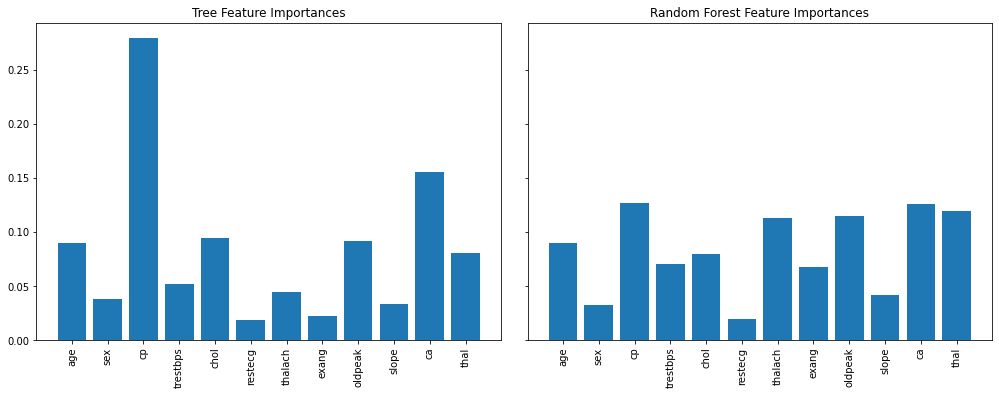

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,5))
plt.tight_layout()

# Fit models
tree.fit(X, y.ravel())
forest.fit(X, y.ravel())

# Plot tree feature importances
tree_feature_importances = tree.feature_importances_
ax1.bar(X.columns, tree_feature_importances)
ax1.set_title("Tree Feature Importances")
plt.sca(ax1)
plt.xticks(rotation="vertical")

# Plot gradient boosting feature importances
forest_feature_importances = forest.feature_importances_
ax2.bar(X.columns, forest_feature_importances)
ax2.set_title("Random Forest Feature Importances")
plt.sca(ax2)
plt.xticks(rotation="vertical")

plt.savefig("featureimportance.eps", bbox_inches="tight", pad_inches=0, format="eps", dpi=600)

plt.show()

An interesting oberservation is that the single decision tree values certain features as very important compared to others. We did not get this type of association when we looked at feature selection. The random forest more closely resembles how we expect the feature importance to look like from the associations calculated earlier.

***

## 5 Conclusion

The aim of this study was to build a model which accurately predicts if a patient has heart disease given information about the health and life style of the patient. It is important to recognise the sensitivity of this type of information, therefore it is best to say a patient is likely to have heart disease, rather than definitively say they have heart disease.

I would like to test this model on unseen data in the future to see how well the model performs. This will allow us to accurately test how well the model actually performs, as we seemingly got a perfect score.

Another area to do further research into is the feature selection aspect of the study. We removed fasting blood sugar as we showed it was independent of the target. Intuitively we expect that this feature should be related to predicting if a patient has heart disease, therefore more analysis will have to be done to work out why it is not dependent.

I will keep updating this study, any criticisms and feedback would be welcomed.
